In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load data
file_path = 'https://www.sharkattackfile.net/spreadsheets/GSAF5.xls'
# file_path = r'C:\Users\pablo\vscode101\Project_Files\GSAF5.xls'
df = pd.read_excel(file_path)

# Quick look at columns and missingness
display(df.info())

# Display the first few rows
# df.info()
# df.dtypes
# df.nunique()
# df.describe()
# display(df.isna().sum())
# display((df.isna().sum()/df.shape[0])*100)
# df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7045 entries, 0 to 7044
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            7045 non-null   object 
 1   Year            7043 non-null   float64
 2   Type            7027 non-null   object 
 3   Country         6995 non-null   object 
 4   State           6560 non-null   object 
 5   Location        6478 non-null   object 
 6   Activity        6460 non-null   object 
 7   Name            6826 non-null   object 
 8   Sex             6466 non-null   object 
 9   Age             4051 non-null   object 
 10  Injury          7010 non-null   object 
 11  Fatal Y/N       6484 non-null   object 
 12  Time            3519 non-null   object 
 13  Species         3914 non-null   object 
 14  Source          7025 non-null   object 
 15  pdf             6799 non-null   object 
 16  href formula    6794 non-null   object 
 17  href            6796 non-null   o

None

In [2]:
display(df.head())

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,6th September,2025.0,Unprovoked,Australia,NSW,Long Reef Sydney,Surfing,Mercury Psillaskis,M,57,...,Great White Shark,Todd Smith: Andy Currie: Simon De Marchi: Kevi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1st September,2025.0,Unprovoked,USA,Florida,Horseshoe reef Key Largo,Snorkeling,Richard Burrows,M,8,...,Not stated,Todd Smith: US SUN: NY Post: The Guardian: Peo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30th August,2025.0,Unprovoked,USA,Texas,Galveston,Swimming,Harper Ochoa,F,8,...,Not stated,Bob Myatt GSAF : People:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18th August,2025.0,Unprovoked,Australia,NSW,Cabarita Beach,Surfing,Brad Ross,M,?,...,5m (16.5ft) Great White,Bob Myatt GSAF The Guardian: 9 News: ABS News:...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17th August,2025.0,Unprovoked,Bahamas,Atlantic Ocean near Big Grand Cay,North of Grand Bahama near Freeport,Spearfishing,Not stated,M,63,...,Undetermined,Ralph Collier GSAF and Kevin MCMurray Tracking...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
display(df.isnull().sum())

Date                 0
Year                 2
Type                18
Country             50
State              485
Location           567
Activity           585
Name               219
Sex                579
Age               2994
Injury              35
Fatal Y/N          561
Time              3526
Species           3131
Source              20
pdf                246
href formula       251
href               249
Case Number        247
Case Number.1      248
original order     246
Unnamed: 21       7044
Unnamed: 22       7043
dtype: int64

In [4]:
display(df['Activity'].value_counts())

Activity
Surfing                                                                            1139
Swimming                                                                           1004
Fishing                                                                             493
Spearfishing                                                                        391
Wading                                                                              178
                                                                                   ... 
Fishing from a small boat & put his hand in the water while holding a dead fish       1
Swimming naked near a date palm where many dates fell into the water                  1
Swimming in section of river used for washing clothes & cooking utensils              1
Swimming with fish attached to  belt                                                  1
The cutter Francis Adams foundered                                                    1
Name: count, Length: 16

In [5]:
# Drop unnecessary columns
columns_to_drop = ['Unnamed: 21', 'Unnamed: 22', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1', 'original order', 'Source']
df_clean = df.drop(columns=columns_to_drop, errors='ignore')

In [6]:
# Standardize column names
df_clean.columns = df_clean.columns.str.strip().str.replace(' ', '_')

In [7]:
display(df['Country'].value_counts())

Country
USA                   2572
AUSTRALIA             1481
SOUTH AFRICA           597
NEW ZEALAND            144
BAHAMAS                136
                      ... 
BAHREIN                  1
KOREA                    1
RED SEA?                 1
ASIA?                    1
CEYLON (SRI LANKA)       1
Name: count, Length: 247, dtype: int64

In [8]:
# Filter for surfing-related attacks
# surfing_activities = df_clean['Activity'].str.contains('surf', case=False, na=False)
# df_surf = df_clean[surfing_activities].copy().reset_index(drop=True)

In [9]:
# Improved regex for filtering surfing-related attacks
# This matches 'surf', 'surfing', 'surfer', 'windsurf', 'kite-surf', etc., and ignores words like 'surface'
regex_pattern = r"\bsurf\w*\b"  # \b = word boundary, \w* = zero or more word chars (matches 'surf', 'surfing', etc.)
surfing_activities = df_clean['Activity'].str.contains(regex_pattern, flags=re.IGNORECASE, na=False, regex=True)
df_surf = df_clean[surfing_activities].copy().reset_index(drop=True)

In [10]:
# Where is the best market for surfing insurance?
top_country = df['Country'].value_counts().idxmax()
print(f"Best market: {top_country}")

# Which states/beaches are highest risk?
top_state = df_surf[df_surf['Country'] == top_country]['State'].value_counts().idxmax()
print(f"In {top_country}, highest risk state: {top_state}")

Best market: USA
In USA, highest risk state: Florida


In [53]:
# def attacks_pivot(df: pd.DataFrame) -> pd.DataFrame:
#     # Group by Country and count attacks
#     pivot = df.groupby('Country').size().reset_index(name='Attack_Count')

#     # Sort by Attack_Count descending for risk ranking
#     pivot = pivot.sort_values(by='Attack_Count', ascending=False).reset_index(drop=True)

#     return pivot

# display(attacks_pivot(df_surf))

def attacks_top10_countries(df: pd.DataFrame) -> pd.DataFrame:
    # Group by Country and count attacks
    country_counts = df.groupby('Country').size().reset_index(name='Attack_Count')
    # Sort in descending order
    country_counts = country_counts.sort_values(by='Attack_Count', ascending=False)
    # Select only the top 10
    top10 = country_counts.head(10).reset_index(drop=True)
    return top10

display(attacks_top10_countries(df_surf))

,Country,Attack_Count
0,USA,812
1,AUSTRALIA,318
2,SOUTH AFRICA,141
3,BRAZIL,40
4,REUNION,20
5,NEW ZEALAND,19
6,MEXICO,12
7,INDONESIA,7
8,NEW CALEDONIA,6
9,ECUADOR,4


In [51]:
# Check missingness in relevant columns
print(df_surf[['Country', 'State', 'Location', 'Date', 'Year', 'Fatal_Y/N', 'Injury', 'Sex']].isnull().sum())

Country       1
State         9
Location     17
Date          0
Year          1
Fatal_Y/N     0
Injury        7
Sex          30
dtype: int64


In [12]:
df_surf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1427 entries, 0 to 1426
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1427 non-null   object 
 1   Year       1427 non-null   float64
 2   Type       1424 non-null   object 
 3   Country    1426 non-null   object 
 4   State      1418 non-null   object 
 5   Location   1410 non-null   object 
 6   Activity   1427 non-null   object 
 7   Name       1417 non-null   object 
 8   Sex        1398 non-null   object 
 9   Age        1126 non-null   object 
 10  Injury     1420 non-null   object 
 11  Fatal_Y/N  1378 non-null   object 
 12  Time       1104 non-null   object 
 13  Species    880 non-null    object 
dtypes: float64(1), object(13)
memory usage: 156.2+ KB


In [13]:
df_surf.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal_Y/N,Time,Species
0,6th September,2025.0,Unprovoked,Australia,NSW,Long Reef Sydney,Surfing,Mercury Psillaskis,M,57,Both legs and arm severed,Y,0930hrs,Great White Shark
1,18th August,2025.0,Unprovoked,Australia,NSW,Cabarita Beach,Surfing,Brad Ross,M,?,None sustained board severly damaged,N,0730hrs,5m (16.5ft) Great White
2,7th August,2025.0,Unprovoked,Australia,NSW,Tathra Beach,Surfing,Bowie Daley,M,9,None sustained board severely damaged,N,1630hrs,Suspected Great White
3,20th July,2025.0,Unprovoked,Canary Islands,Fuerteventura,Los Mollinas,Surfing (Hydrofoiling),Unknown,M,?,Lacerations to left leg above the knee,N,PM,Undetermined
4,18th July,2025.0,Unprovoked,USA,Florida,New Smyrna Beach,Surfing,Sam Hollis,M,18,Lacerations to left foot,N,1150hrs,Undetermined


In [14]:
# Standardize 'Country' and 'State'
df_surf['Country'] = df_surf['Country'].str.upper().str.strip()
df_surf['State'] = df_surf['State'].str.title().str.strip()

In [15]:
# Convert 'Year' to integer, handle missing/invalid as NaN
df_surf['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')

In [16]:
display(df_surf['Sex'].unique())
print('------------------------------')
display(df_surf['Sex'].isnull().sum())
print('------------------------------')
# display(df_surf['Sex'])

array(['M', 'F', nan, 'lli'], dtype=object)

------------------------------


np.int64(29)

------------------------------


In [17]:
# Standardize 'Sex'
df_surf['Sex'] = df_surf['Sex'].apply(
    lambda x: (
        None if pd.isnull(x)
        else 'M' if str(x).strip().upper() in ['MALE', 'M']
        else 'F' if str(x).strip().upper() in ['FEMALE', 'F']
        else None
    )
)

In [18]:
display(df_surf['Sex'].unique())
print('------------------------------')
display(df_surf['Sex'].isnull().sum())
print('------------------------------')
# display(df_surf['Sex'])

array(['M', 'F', None], dtype=object)

------------------------------


np.int64(30)

------------------------------


In [19]:
display(df_surf['Fatal_Y/N'].unique())
print('------------------------------')
display(df_surf['Fatal_Y/N'].isnull().sum())
print('------------------------------')
# display(df_surf['Fatal_Y/N'])

array(['Y', 'N', 'F', nan, 'Nq', 'UNKNOWN', ' N'], dtype=object)

------------------------------


np.int64(49)

------------------------------


In [20]:
# Standarize values in column Fatal_Y/N using regex
def clean_fatal_yn(val):
    if pd.isnull(val):
        return 'Unknown'
    val_str = str(val).strip().upper()
    if re.search(r'\bY\b', val_str) or re.search(r'\bF\b', val_str) or re.match(r'Y', val_str):
        return 'Y'
    if re.search(r'\bN\b', val_str) or re.search(r'\bM\b', val_str) or re.match(r'N', val_str):
        return 'N'
    # if val_str in ['UNKNOWN', '', 'NQ']:
    #     return 'Unknown'
    return 'Unknown'
    
df_surf['Fatal_Y/N'] = df_surf['Fatal_Y/N'].apply(clean_fatal_yn)

In [21]:
display(df_surf['Fatal_Y/N'].unique())
print('------------------------------')
display(df_surf['Fatal_Y/N'].isnull().sum())
print('------------------------------')
# display(df_surf['Fatal_Y/N'])

array(['Y', 'N', 'Unknown'], dtype=object)

------------------------------


np.int64(0)

------------------------------


In [22]:
# display(df_surf['Age'])
# print('------------------------------')
display(df_surf['Age'].nunique())
print('------------------------------')
display(df_surf['Age'].isnull().sum())

133

------------------------------


np.int64(301)

In [23]:
# Standarize values in column Age using regex
df_surf['Age'] = pd.to_numeric(df['Age'], errors='coerce').astype('Int64')

In [24]:
# display(df_surf['Age'])
# print('------------------------------')
display(df_surf['Age'].nunique())
print('------------------------------')
display(df_surf['Age'].isnull().sum())

75

------------------------------


np.int64(393)

In [25]:
df_surf

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal_Y/N,Time,Species
0,6th September,2025,Unprovoked,AUSTRALIA,Nsw,Long Reef Sydney,Surfing,Mercury Psillaskis,M,57,Both legs and arm severed,Y,0930hrs,Great White Shark
1,18th August,2025,Unprovoked,AUSTRALIA,Nsw,Cabarita Beach,Surfing,Brad Ross,M,8,None sustained board severly damaged,N,0730hrs,5m (16.5ft) Great White
2,7th August,2025,Unprovoked,AUSTRALIA,Nsw,Tathra Beach,Surfing,Bowie Daley,M,8,None sustained board severely damaged,N,1630hrs,Suspected Great White
3,20th July,2025,Unprovoked,CANARY ISLANDS,Fuerteventura,Los Mollinas,Surfing (Hydrofoiling),Unknown,M,<NA>,Lacerations to left leg above the knee,N,PM,Undetermined
4,18th July,2025,Unprovoked,USA,Florida,New Smyrna Beach,Surfing,Sam Hollis,M,63,Lacerations to left foot,N,1150hrs,Undetermined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,16-Feb-1910,2013,Unprovoked,AUSTRALIA,Western Australia,Bunbury,Surf bathing,George Cridland,M,62,"Shoulder, back & leg bitten",N,Night,5.5' to 6' shark
1423,1842,2013,Unprovoked,INDIA,Tamil Nadu,Chennai (formerly Madras),Washed off catamaran in the surf,male,M,43,FATAL,Y,NaN,NaN
1424,1828,2013,Unprovoked,USA,Hawaii,"Uo, Lahaina, Maui",Surfing,Male,M,<NA>,FATAL,Y,NaN,NaN
1425,1779,2013,Unprovoked,USA,Hawaii,"Maliu, Hawai'i",Surfing,Nu'u-anu-pa'a hu,M,26,"FATAL, buttock lacerated",Y,NaN,NaN


In [26]:
# Save Cleaned Data to CSV
df_surf.to_csv('cleaned_data_df_surf.csv', index=False)

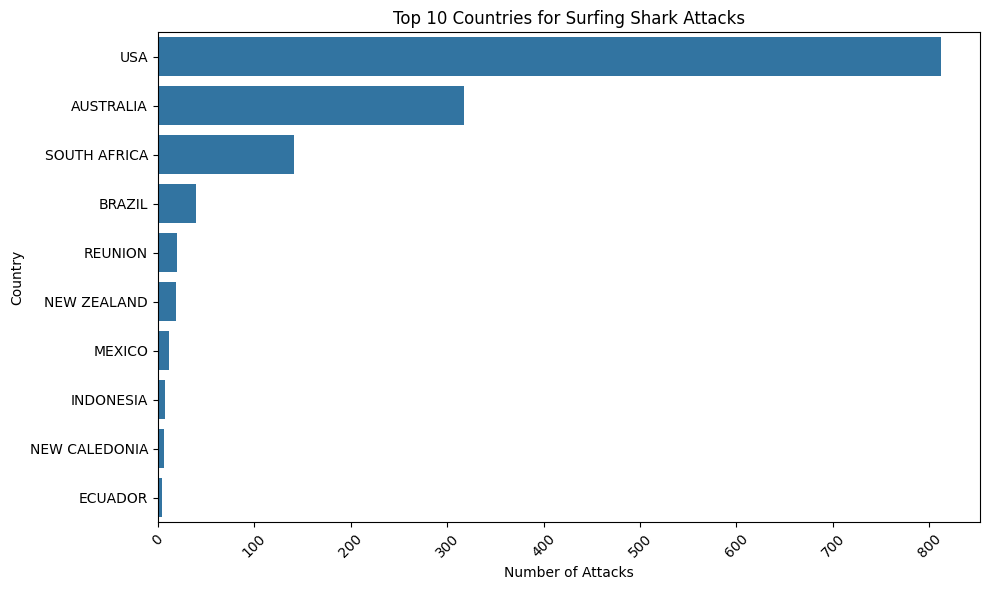

In [37]:
# --- 10 Top Countries More Surfing Attacks ---

plt.figure(figsize=(10,6))
top_countries = df_surf['Country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries for Surfing Shark Attacks")
plt.ylabel("Country")
plt.xlabel("Number of Attacks")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

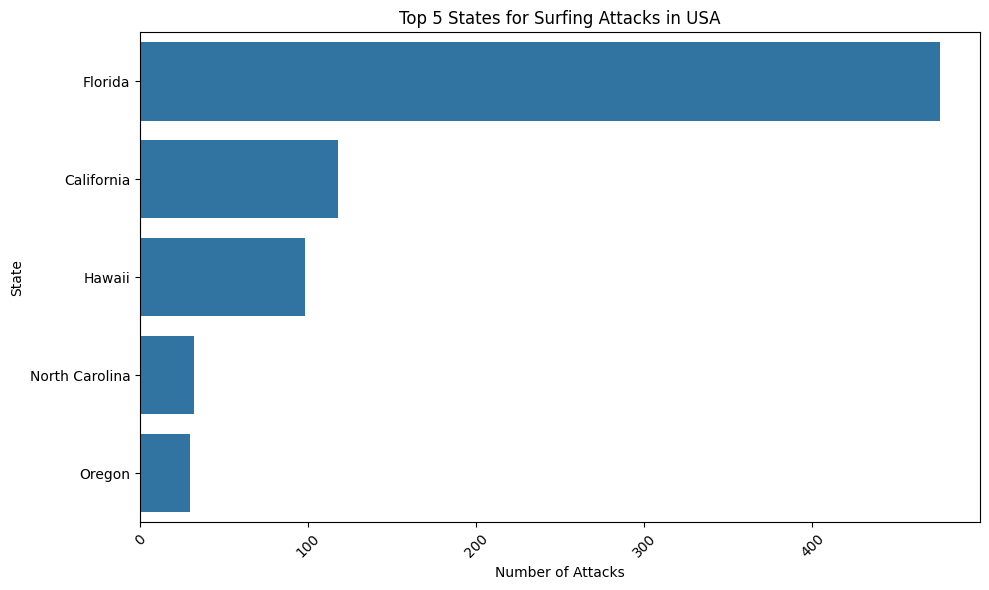

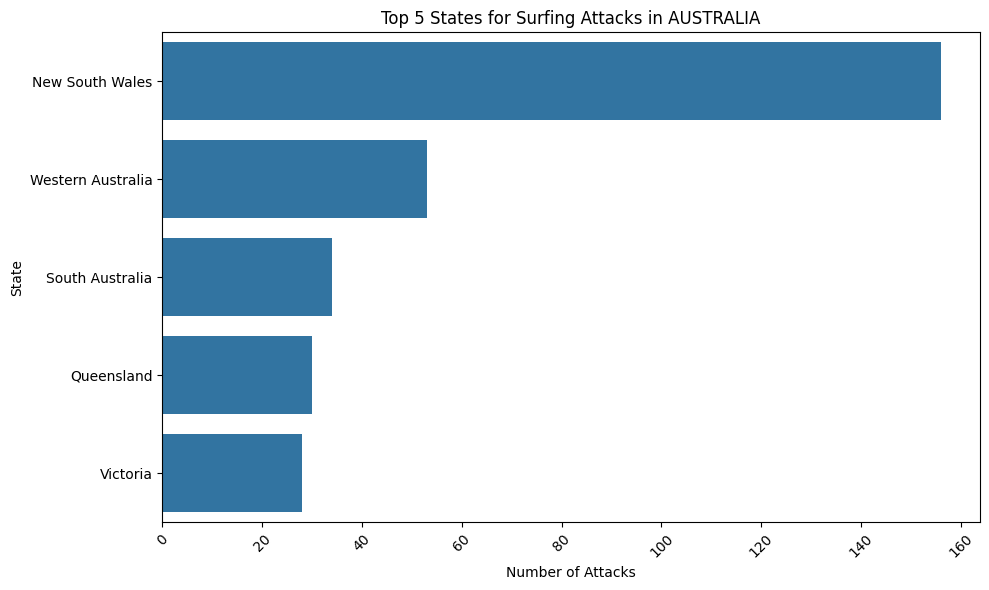

In [38]:
# --- Top states for US and Australia ---
for country in ['USA', 'AUSTRALIA']:
    plt.figure(figsize=(10,6))
    top_states = df_surf[df_surf['Country'] == country]['State'].value_counts().head(5)
    sns.barplot(y=top_states.index, x=top_states.values)
    plt.title(f"Top 5 States for Surfing Attacks in {country}")
    plt.ylabel("State")
    plt.xlabel("Number of Attacks")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [39]:
def attacks_pivot(df: pd.DataFrame) -> pd.DataFrame:
    # Filter only for USA and Australia
    df_filtered = df[df['Country'].isin(['USA', 'AUSTRALIA'])].copy()
    
    # Group by Country, State, Beach and count attacks
    pivot = df_filtered.groupby(['Country', 'State']).size().reset_index(name='Attack_Count')

    # Sort by Attack_Count descending for risk ranking
    pivot = pivot.sort_values(by='Attack_Count', ascending=False).reset_index(drop=True)

    return pivot

display(attacks_pivot(df_surf))

,Country,State,Attack_Count
0,USA,Florida,476
1,AUSTRALIA,New South Wales,156
2,USA,California,118
3,USA,Hawaii,98
4,AUSTRALIA,Western Australia,53
5,AUSTRALIA,South Australia,34
6,USA,North Carolina,32
7,AUSTRALIA,Queensland,30
8,USA,Oregon,30
9,AUSTRALIA,Victoria,28


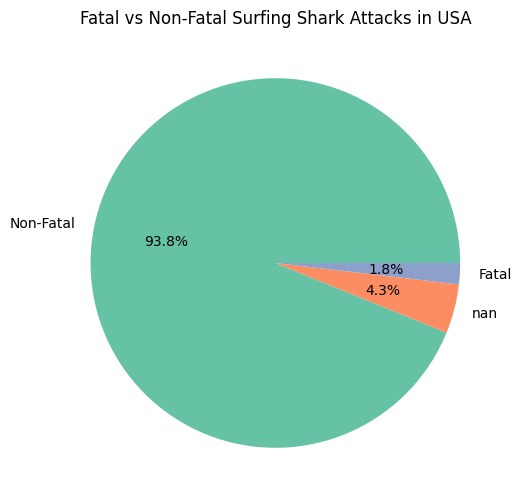

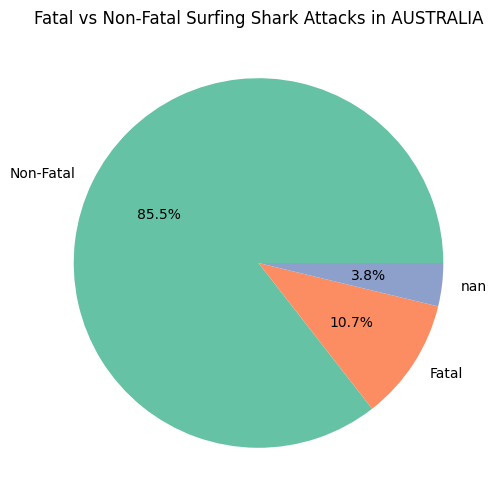

In [40]:
# --- Fatal vs Non-Fatal surfing attacks in USA and ASUTRALIA ---

for country in ['USA', 'AUSTRALIA']:
    country_surf = df_surf[df_surf['Country'] == country]
    # Get counts of fatal vs non-fatal
    fatal_counts_usa = country_surf ['Fatal_Y/N'].value_counts()
    
    # Plot pie chart
    plt.figure(figsize=(6,6))
    plt.pie(fatal_counts_usa, 
            labels=fatal_counts_usa.index.map({'N': 'Non-Fatal', 'Y': 'Fatal'}),
            autopct='%1.1f%%', 
            colors=sns.color_palette('Set2'))
    plt.title(f'Fatal vs Non-Fatal Surfing Shark Attacks in {country}')
    plt.show()

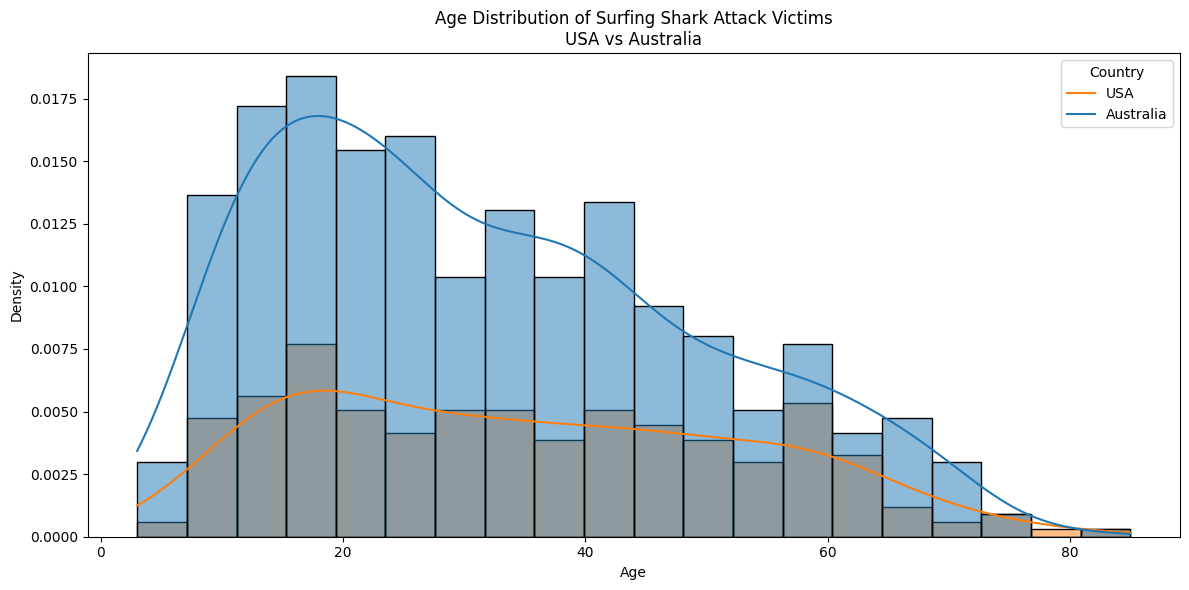

USA - Mean Age: 31.86348122866894 Std Dev: 17.249852148420928
Australia - Mean Age: 35.097457627118644 Std Dev: 18.02064519053919


In [41]:
# --- Distribution and Deviation (standard deviation) of age victims in both the USA and Australia  ---

# Ensure Age column is numeric and drop NaNs
df_surf['Age'] = pd.to_numeric(df_surf['Age'], errors='coerce')

# Filter for USA and Australia only, drop missing ages
df_usa = df_surf[(df_surf['Country'] == 'USA') & (df_surf['Age'].notnull())].copy()
df_aus = df_surf[(df_surf['Country'] == 'AUSTRALIA') & (df_surf['Age'].notnull())].copy()

# Prepare data for plotting
df_usa.loc[:, 'Country'] = 'USA'
df_aus.loc[:, 'Country'] = 'Australia'
df_age = pd.concat([df_usa[['Age','Country']], df_aus[['Age','Country']]])

# Plot distribution and standard deviation
plt.figure(figsize=(12,6))
sns.histplot(data=df_age, x='Age', hue='Country', bins=20, stat='density', kde=True, alpha=0.5)
plt.title('Age Distribution of Surfing Shark Attack Victims\nUSA vs Australia')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Country', labels=['USA', 'Australia'])
plt.tight_layout()
plt.show()

# Print basic stats for context
print("USA - Mean Age:", df_usa['Age'].mean(), "Std Dev:", df_usa['Age'].std())
print("Australia - Mean Age:", df_aus['Age'].mean(), "Std Dev:", df_aus['Age'].std())

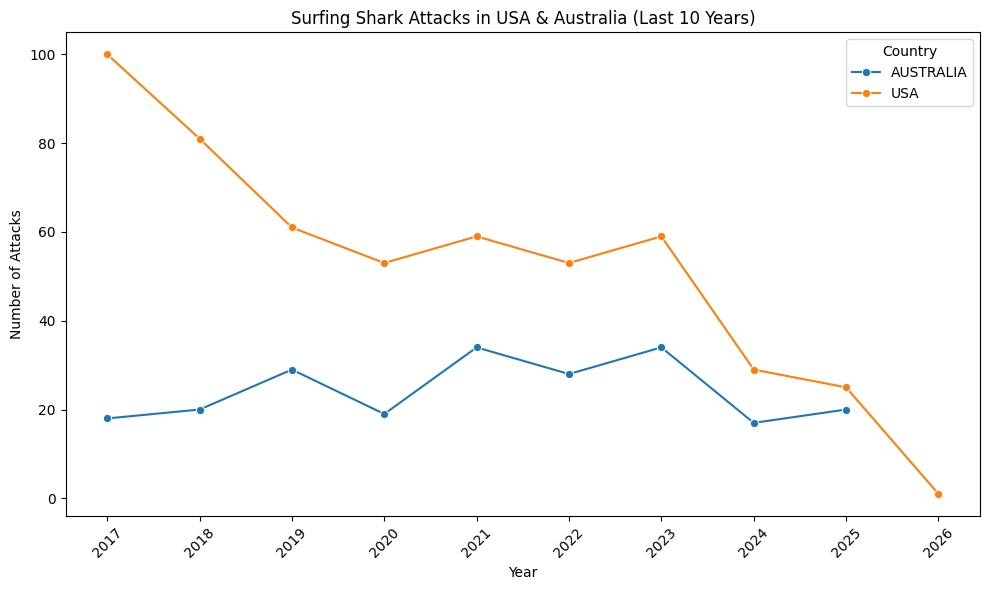

In [42]:
# --- Trend of surfing shark attacks in the last 10 years in USA and AUSTRALIA ---
# Filter for USA and Australia attacks
recent_years = sorted(df_surf['Year'].dropna().unique())[-10:]  # get last 10 years
df_recent = df_surf[df_surf['Year'].isin(recent_years) & df_surf['Country'].isin(['USA', 'AUSTRALIA'])]

# Group by year and country
trend_df = df_recent.groupby(['Year', 'Country']).size().reset_index(name='Attacks')

plt.figure(figsize=(10,6))
sns.lineplot(data=trend_df, x='Year', y='Attacks', hue='Country', marker='o')
plt.title('Surfing Shark Attacks in USA & Australia (Last 10 Years)')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(recent_years, rotation=45)
plt.tight_layout()
plt.show()

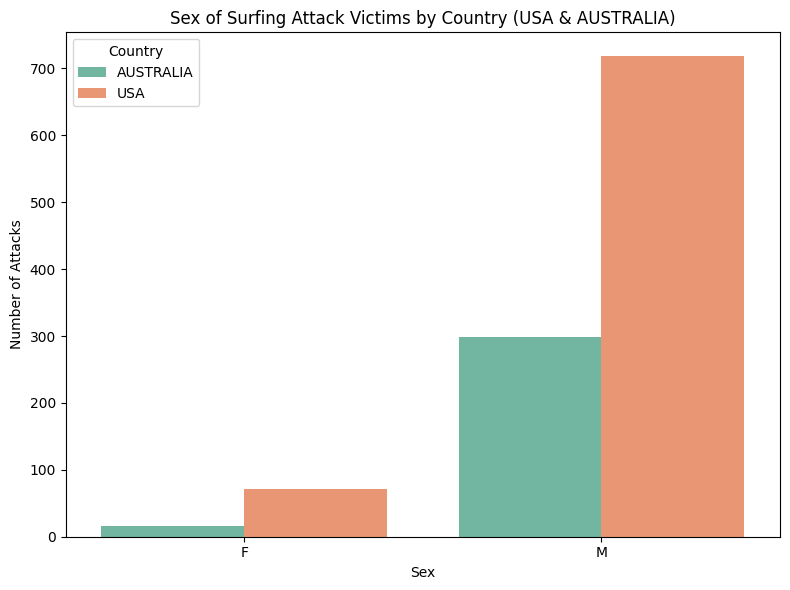

In [49]:
# Filter only USA and AUSTRALIA
df_grouped = df_surf[df_surf['Country'].isin(['USA', 'AUSTRALIA'])]

# Group by Country and Sex, count number of attacks
sex_country_counts = df_grouped.groupby(['Country', 'Sex']).size().reset_index(name='AttackCount')

# Draw grouped barplot
plt.figure(figsize=(8,6))
sns.barplot(data=sex_country_counts, x='Sex', y='AttackCount', hue='Country', palette="Set2")
plt.title("Sex of Surfing Attack Victims by Country (USA & AUSTRALIA)")
plt.xlabel("Sex")
plt.ylabel("Number of Attacks")
plt.legend(title='Country')
plt.tight_layout()
plt.show()

In [44]:
df_grouped = df_surf[df_surf['Country'].isin(['USA', 'AUSTRALIA'])]

# Group by Country and Sex, count number of attacks
sex_country_counts = df_grouped.groupby(['Country', 'Sex']).size().reset_index(name='AttackCount')
pivot_table = sex_country_counts.pivot(index="Country", columns="Sex", values="AttackCount").fillna(0)
display(pivot_table)

Sex,F,M
Country,,
AUSTRALIA,16,299
USA,72,718


In [45]:
# - Country/state/beach risk rankings

def surfing_risk_score(country, state, age, sex):
    score = 0
    if country.upper() in ['USA', 'AUSTRALIA']:
        score += 2
    if state.title() in ['Florida', 'Nsw']:
        score += 2
    if sex == 'M':
        score += 1
    if age and 15 <= age <= 40:
        score += 1
    return score

In [47]:
country = input("Enter country: ")
state = input("Enter state: ")
sex = input("Enter sex (M/F): ")
age = input("Enter age: ")

# Convert age to int, but leave sex as string
age = int(age)

score = surfing_risk_score(country, state, age, sex)
print(score)

Enter country:  australia
Enter state:  nsw
Enter sex (M/F):  M
Enter age:  25


6


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from src.functions import main_cleaning

# %load_ext autoreload
# %autoreload 2

# Load data
file_path = 'https://www.sharkattackfile.net/spreadsheets/GSAF5.xls'
# file_path = r'C:\Users\pablo\vscode101\Project_Files\GSAF5.xls'
df = pd.read_excel(file_path)

# Quick look at columns and missingness
display(df.info())

df_surf = main_cleaning(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7045 entries, 0 to 7044
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            7045 non-null   object 
 1   Year            7043 non-null   float64
 2   Type            7027 non-null   object 
 3   Country         6995 non-null   object 
 4   State           6560 non-null   object 
 5   Location        6478 non-null   object 
 6   Activity        6460 non-null   object 
 7   Name            6826 non-null   object 
 8   Sex             6466 non-null   object 
 9   Age             4051 non-null   object 
 10  Injury          7010 non-null   object 
 11  Fatal Y/N       6484 non-null   object 
 12  Time            3519 non-null   object 
 13  Species         3914 non-null   object 
 14  Source          7025 non-null   object 
 15  pdf             6799 non-null   object 
 16  href formula    6794 non-null   object 
 17  href            6796 non-null   o

None

In [6]:
df_surf.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal_Y/N', 'Time', 'Species'],
      dtype='object')

In [41]:
# Save Cleaned Data to CSV
df_surf.to_csv('cleaned_data_df_surf.csv', index=False)